In [5]:
import pandas as pd
import yfinance as yf
import time
import numpy as np
import matplotlib.pyplot as plt

# Define start and end dates
start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')

# Create an empty dictionary to store dataframes
stock_data = {}

# Define the stock symbols (Yahoo Finance uses different symbols compared to Quandl)
stock_symbols = ['JPM', 'C', 'BAC', 'WFC']

# Fetch data from Yahoo Finance
for stock_symbol in stock_symbols:
    try:
        stock_df = yf.download(stock_symbol, start=start, end=end)

        # Process the stock data
        stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

        # Store the dataframe in the dictionary
        stock_data[stock_symbol] = stock_df

    except Exception as e:
        print(f"Error retrieving data for symbol: {stock_symbol}. Error message: {e}")

# Access and display dataframes (similar to the original loop)
for stock_name, stock_df in stock_data.items():
    print(f"\n{stock_name} DataFrame Head:")
    print(stock_df.head())

allocations = [0.3, 0.2, 0.4, 0.1]
for (stock_name, stock_df), allocation in zip(stock_data.items(), allocations):
    stock_df['Allocation'] = stock_df['Normed Return'] * allocation

# Display the head of the JPM dataframe with allocation
print("\nJPM DataFrame with Allocation Head:")
print(stock_data['JPM'].head())

# Calculate and add position values to each dataframe
for stock_df in stock_data.values():
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

# Display the head of the JPM dataframe with allocation and position values
print("\nJPM DataFrame with Allocation and Position Values Head:")
print(stock_data['JPM'].head())


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


JPM DataFrame Head:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2013-01-02  44.980000  45.000000  44.220001  44.660000  32.691410  31413000   
2013-01-03  44.740002  44.750000  44.200001  44.570000  32.625526  24227700   
2013-01-04  44.450001  45.430000  44.439999  45.360001  33.203819  24487700   
2013-01-07  45.090000  45.490002  45.020000  45.410000  33.240417  24456900   
2013-01-08  45.400002  45.500000  44.959999  45.500000  33.306293  19624200   

            Normed Return  
Date                       
2013-01-02       1.000000  
2013-01-03       0.997985  
2013-01-04       1.015674  
2013-01-07       1.016794  
2013-01-08       1.018809  

C DataFrame Head:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2013-01-02  40.910000  41.400002  40.700001  41.2500

In [6]:
# Extract the position values for each stock
jpm = stock_data['JPM']
citi = stock_data['C']
bofa = stock_data['BAC']
wfc = stock_data['WFC']

# Combine the position values into a single DataFrame and calculate the total position
portfolio_val = pd.concat([jpm['Position Values'], citi['Position Values'], bofa['Position Values'], wfc['Position Values']], axis=1)
portfolio_val.columns = ['JPM Pos', 'CITI Pos', 'BOFA Pos', 'WFC Pos']
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

# Display the head of the portfolio valuation DataFrame
print("\nPortfolio Valuation DataFrame Head:")
print(portfolio_val.head())


Portfolio Valuation DataFrame Head:
                  JPM Pos       CITI Pos       BOFA Pos        WFC Pos  \
Date                                                                     
2013-01-02  300000.000000  200000.000000  400000.000000  100000.000000   
2013-01-03  299395.404147  200678.713652  397672.499304   99172.614203   
2013-01-04  304702.237155  205721.163551  402660.100441   99686.172103   
2013-01-07  305038.088734  205915.054581  401994.939702   99201.140570   
2013-01-08  305642.614573  205866.558062  398337.466288   99029.952079   

               Total Pos  
Date                      
2013-01-02  1.000000e+06  
2013-01-03  9.969192e+05  
2013-01-04  1.012770e+06  
2013-01-07  1.012149e+06  
2013-01-08  1.008877e+06  


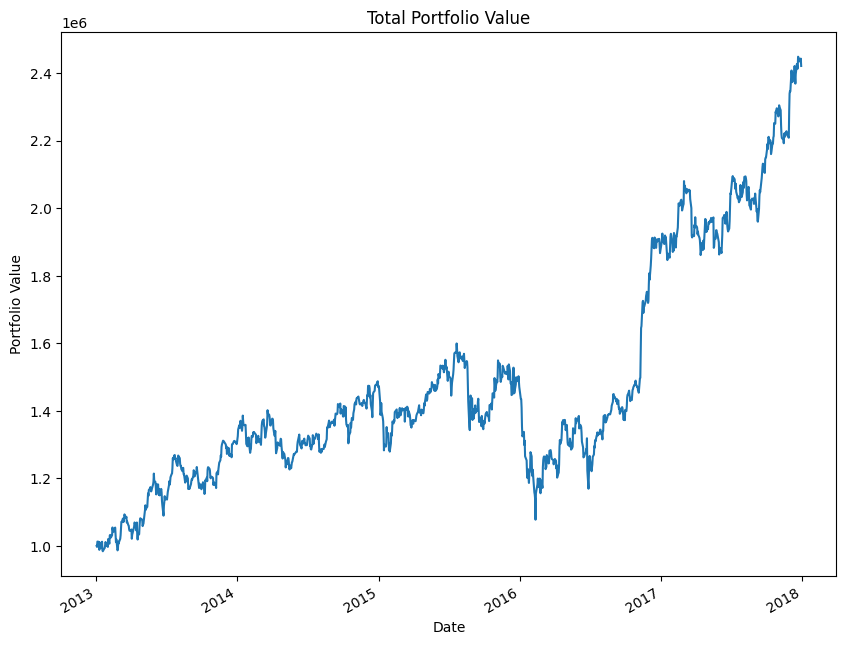

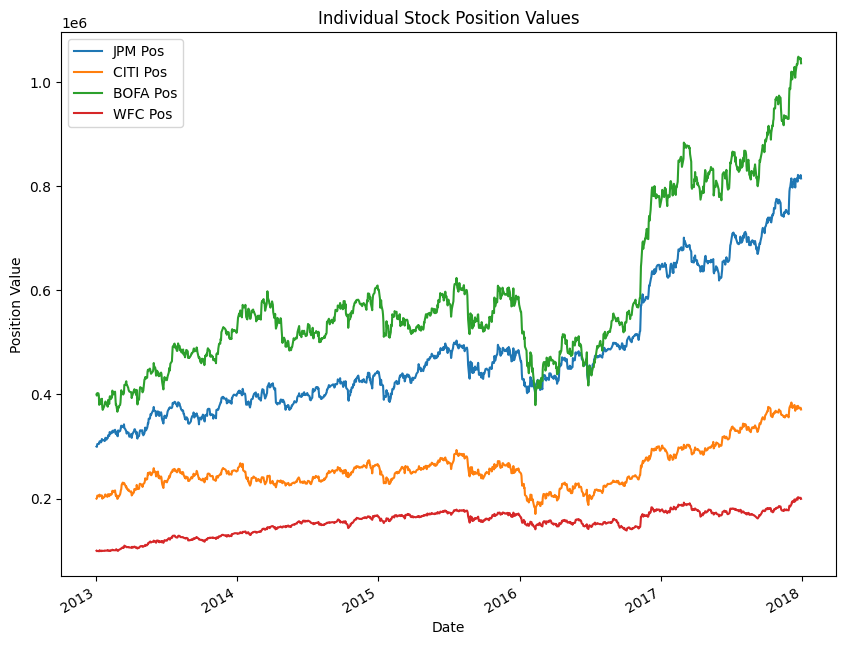

In [7]:
# Plot the total portfolio value
portfolio_val['Total Pos'].plot(figsize=(10, 8))
plt.title('Total Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()

# Plot the individual stock position values
portfolio_val.drop('Total Pos', axis=1).plot(kind='line', figsize=(10, 8))
plt.title('Individual Stock Position Values')
plt.xlabel('Date')
plt.ylabel('Position Value')
plt.show()


In [8]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val

,JPM Pos,CITI Pos,BOFA Pos,WFC Pos,Total Pos,Daily Return
Date,,,,,,
2013-01-02,300000.000000,200000.000000,4.000000e+05,100000.000000,1.000000e+06,NaN
2013-01-03,299395.404147,200678.713652,3.976725e+05,99172.614203,9.969192e+05,-0.003081
2013-01-04,304702.237155,205721.163551,4.026601e+05,99686.172103,1.012770e+06,0.015899
2013-01-07,305038.088734,205915.054581,4.019949e+05,99201.140570,1.012149e+06,-0.000613
2013-01-08,305642.614573,205866.558062,3.983375e+05,99029.952079,1.008877e+06,-0.003233
...,...,...,...,...,...,...
2017-12-22,818451.813140,376489.524479,1.048204e+06,202514.909324,2.445660e+06,-0.001076
2017-12-26,815176.332581,372948.542010,1.044696e+06,201132.982167,2.433953e+06,-0.004787
2017-12-27,816699.881923,373497.234617,1.042941e+06,200540.796907,2.433679e+06,-0.000113


In [9]:
# Calculate the cumulative return
cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
print('Our cumulative return is {} percent!'.format(cum_ret))

Our cumulative return is 142.08646514677622 percent!


C:\Users\awadh\AppData\Local\Temp\ipykernel_18276\4253317811.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)


In [10]:
portfolio_val['Daily Return'].mean()

0.0007917119522683126

In [11]:
portfolio_val['Daily Return'].std()

0.01331999771815635

In [12]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.059437844436650185

In [13]:
ASR = (252**0.5)*SR
ASR

0.9435465290707225

In [14]:


# Extract and combine the adjusted close prices into a single DataFrame for daily returns
jpm_close = jpm['Adj Close']
citi_close = citi['Adj Close']
bofa_close = bofa['Adj Close']
wfc_close = wfc['Adj Close']

# Combine daily close prices into a single DataFrame
stocks = pd.concat([jpm_close, citi_close, bofa_close, wfc_close], axis=1)
stocks.columns = ['jpm', 'citi', 'bofa', 'wfc']

# Display the head of the daily returns DataFrame
print("\nDaily Returns DataFrame Head:")
print(stocks.head())


Daily Returns DataFrame Head:
                  jpm       citi      bofa        wfc
Date                                                 
2013-01-02  32.691410  32.108685  9.844129  25.187162
2013-01-03  32.625526  32.217648  9.786848  24.978767
2013-01-04  33.203819  33.027180  9.909595  25.108118
2013-01-07  33.240417  33.058308  9.893225  24.985952
2013-01-08  33.306293  33.050522  9.803213  24.942835


In [15]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,jpm,citi,bofa,wfc
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.002017,0.003388,-0.005836,-0.008308
2013-01-04,0.017570,0.024816,0.012464,0.005165
2013-01-07,0.001102,0.000942,-0.001653,-0.004877
2013-01-08,0.001980,-0.000236,-0.009140,-0.001727


In [16]:
#calculate the log return mean of each stock
log_ret.mean() * 252

jpm     0.200093
citi    0.123829
bofa    0.190552
wfc     0.138468
dtype: float64

In [17]:
# Compute pairwise covariance of columns
log_ret.cov()*252

,jpm,citi,bofa,wfc
jpm,0.040798,0.040906,0.042133,0.029296
citi,0.040906,0.056830,0.050860,0.033127
bofa,0.042133,0.050860,0.063359,0.035109
wfc,0.029296,0.033127,0.035109,0.034247


In [18]:
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['jpm', 'citi', 'bofa', 'wfc'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.15785481068955484


Expected Volatility
0.2047772403532361


Sharpe Ratio
0.7708611094536623


In [21]:
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [22]:
sharpe_arr.max()

0.9751228192097959

In [23]:
sharpe_arr.argmax()

12448

In [24]:
all_weights[1248,:]

array([0.2321235 , 0.31061436, 0.35965486, 0.09760727])

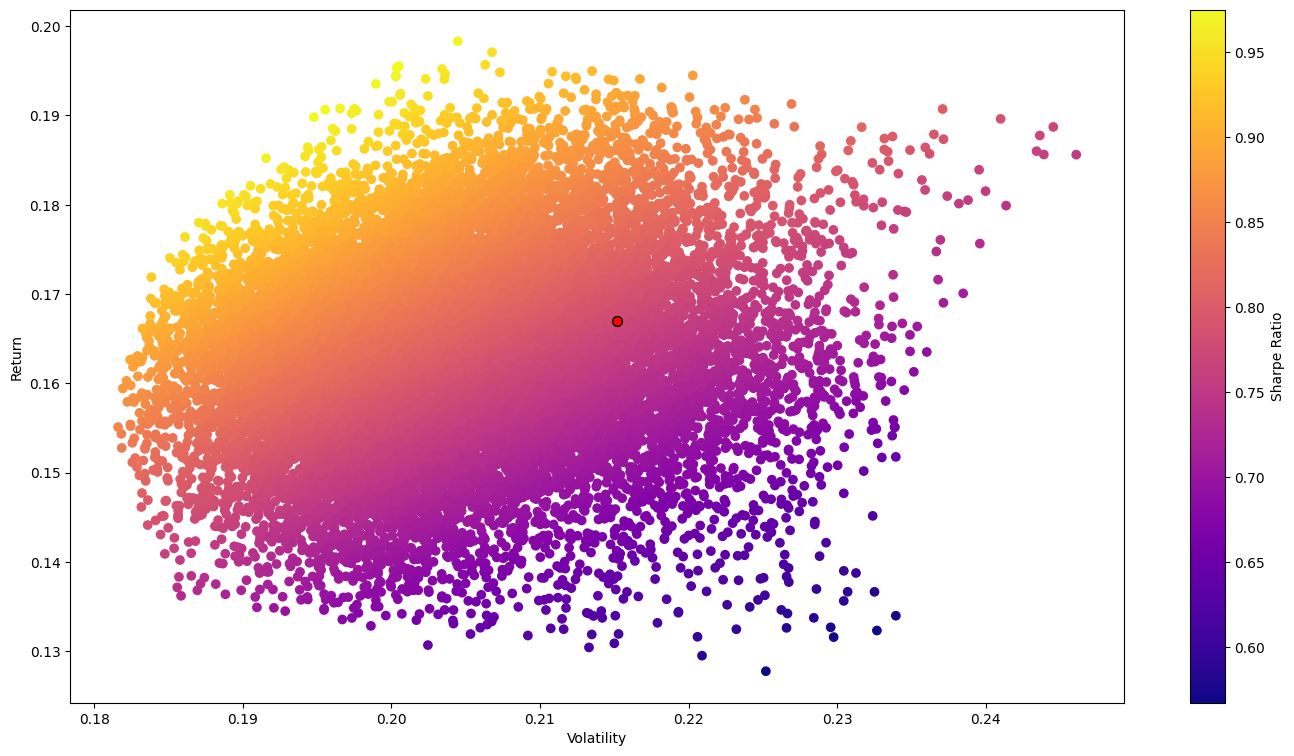

In [25]:
max_sr_ret = ret_arr[1248]
max_sr_vol = vol_arr[1248]
plt.figure(figsize=(17,9))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')